In [1]:
import pandas as pd
import numpy as np

In [154]:
fraud_df = pd.read_csv("insurance_claims.csv")

In [155]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [156]:
fraud_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [157]:
fraud_df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,2015-01-30,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-01-05,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [158]:
fraud_df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,1994-02-05,IL,100/300,500,1564.43,3000000,477644,FEMALE,MD,prof-specialty,movies,unmarried,77500,-32800,2015-01-31,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Northbrook,4755 1st St,18,1,?,2,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,MALE,MD,other-service,basketball,other-relative,59400,-32200,2015-02-06,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Riverwood,5312 Francis Ridge,21,1,NO,0,1,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,MALE,MD,exec-managerial,camping,husband,50300,0,2015-01-23,Multi-vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,1705 Weaver St,6,3,YES,1,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,2015-02-17,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,1643 Washington Hwy,20,3,?,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,2015-01-22,Parked Car,?,Minor Damage,None,SC,Northbend,6516 Solo Drive,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [159]:
fraud_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [160]:
# based on the dataset sumary 
# need to delete the _c39 col coz its totally empty
fraud_df.drop('_c39', axis=1, inplace=True)

# need to extract year and month from the date col for futuer analysis
fraud_df['policy_bind_year']=fraud_df['policy_bind_date'].str.extract('(\d{4})\-').astype('int32')
fraud_df['policy_bind_month']=fraud_df['policy_bind_date'].str.extract('\d{4}\-(\d{2})').astype('int32')

#incident month extract
fraud_df['incident_month']=fraud_df['incident_date'].str.extract('\d{4}\-(\d{2})').astype('int32')
#deleting the date col as we have extracted year and month
fraud_df.drop('policy_bind_date', axis=1, inplace=True)

#replace "?" with unknown 

fraud_df['collision_type'] = fraud_df['collision_type'].replace("?", "unknown")
fraud_df['police_report_available'] = fraud_df['police_report_available'].replace("?", "unknown")
fraud_df['property_damage'] = fraud_df['property_damage'].replace("?", "unknown")

#incident_severity can be seen as ordinal
#code them in order of severity 

fraud_df['incident_severity'] = fraud_df['incident_severity'].map({"Trivial Damage":0,
                                                       "Minor Damage":1,
                                                       "Major Damage":2,
                                                       "Total Loss":3
                                                      }).astype("int32")
fraud_df.incident_severity.value_counts()



1    354
3    280
2    276
0     90
Name: incident_severity, dtype: int64

In [161]:
fraud_df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,2,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,unknown,1,Police,VA,Riverwood,6608 MLK Hwy,8,1,unknown,0,0,unknown,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,1,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,9,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,2,Police,OH,Arlington,6956 Maple Drive,5,1,unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,unknown,1,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,2


In [162]:
#umbrella limit is like an insruance topup that pays your liabilities in case you get sued
#cannot be zero
#this 0 is an error

fraud_df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
635           0
636           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
622           0
650           0
621           0
618           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
602           0
620           0
604           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
617           0
605           0
588           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [163]:
#edit to positve
fraud_df['umbrella_limit'].iloc[290] = 1000000
#check
fraud_df['umbrella_limit'].sort_values(ascending=True)

D:\anaconda\envs\jkt_demo\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0             0
622           0
623           0
624           0
625           0
627           0
628           0
629           0
630           0
632           0
633           0
634           0
621           0
635           0
637           0
638           0
640           0
641           0
642           0
643           0
645           0
646           0
647           0
648           0
649           0
636           0
650           0
620           0
617           0
588           0
589           0
590           0
591           0
592           0
593           0
594           0
595           0
596           0
600           0
601           0
618           0
602           0
605           0
606           0
608           0
609           0
610           0
611           0
612           0
613           0
614           0
615           0
616           0
604           0
587           0
651           0
655           0
698           0
699           0
701           0
702           0
703           0
704     

In [164]:
#checking out the variables
all_var = list(fraud_df.columns)
len(all_var)

41

In [165]:
#continuous variables = ordinal, interval, ratio

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [166]:
#ordinal var

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)

4

In [167]:
#quan var = interval or ratio 

quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [168]:
#norminal aka discrete var

nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

23

In [169]:
#check for norminal data with vevry large number of categories

for col in nom_var:
    if col != "insured_zip" and col!="incident_location" and col !="policy_number": #excluding these varibales coz all contains diff unique val
        print("###", col, "###" )
        print("  ")
        print(fraud_df[col].value_counts())
        print("---------------------------------------------")
        print("  ")

### incident_state ###
  
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64
---------------------------------------------
  
### insured_occupation ###
  
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
---------------------------------------------
  
### police_report_available ###
  
NO         343
unknown    343
YES        314
Name: police_report_available, dtype: int64
---------------------------------------------
  
### property_damage ###
  
unknown    360
NO         338
YES        302
Name: property_damage, dtype: int64
---------------------------------------------
  
### auto_make ###
  
Saab          8

In [170]:
#for those that have not too many unique, we can plot them out

large_cat = []

for col in nom_var:
    if fraud_df[col].nunique() > 20:
        large_cat.append(col)
        print(col, fraud_df[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

insured_zip 995
auto_model 39
incident_date 60
incident_location 1000
policy_number 1000


In [171]:
#drop this variables(that contains too many unique values) from analysis 

fraud_df.drop(large_cat, axis=1, inplace=True)

In [172]:
#checking after deleting the variables
fraud_df.head(10)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,policy_bind_year,policy_bind_month,incident_month
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,2,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,2004,Y,2014,10,1
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,unknown,1,Police,VA,Riverwood,8,1,unknown,0,0,unknown,5070,780,780,3510,Mercedes,2007,Y,2006,6,1
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,1,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,2007,N,2000,9,2
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,2,Police,OH,Arlington,5,1,unknown,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y,1990,5,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,unknown,1,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,2009,N,2014,6,2
5,256,39,OH,250/500,1000,1351.10,0,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,Multi-vehicle Collision,Rear Collision,2,Fire,SC,Arlington,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,2003,Y,2006,10,1
6,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,1,Police,NY,Springfield,0,3,unknown,0,0,unknown,78650,21450,7150,50050,Nissan,2012,N,2000,6,1
7,165,37,IL,100/300,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,0,0,Multi-vehicle Collision,Front Collision,3,Police,VA,Columbus,23,3,unknown,2,2,YES,51590,9380,9380,32830,Audi,2015,N,1990,2,2
8,27,33,IL,100/300,500,1442.99,0,FEMALE,PhD,other-service,golf,own-child,0,0,Single Vehicle Collision,Front Collision,3,Police,WV,Arlington,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,2012,N,1997,2,1
9,212,42,IL,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,0,-39300,Single Vehicle Collision,Rear Collision,3,Other,NC,Hillsdale,14,1,NO,2,1,unknown,42300,4700,4700,32900,Saab,1996,N,2011,7,1


In [173]:
#lets look at the labels distribution

fraud_df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

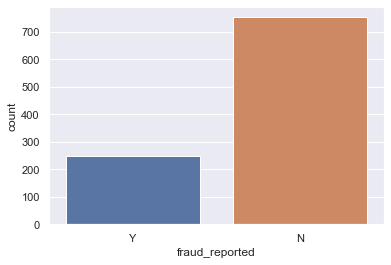

In [174]:
#plotting 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.countplot(x ="fraud_reported", data=fraud_df);

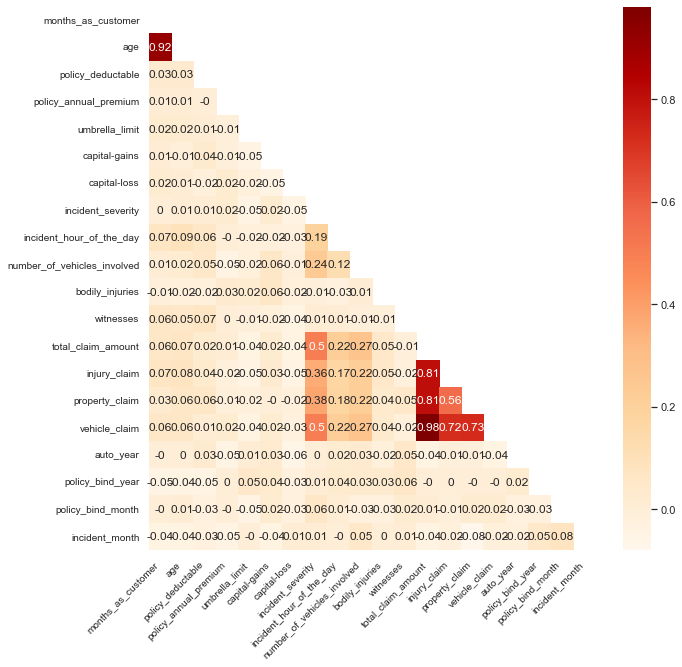

In [175]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=fraud_df.columns

corr_df = fraud_df[corr_list]
corr=round(corr_df.corr(),2)

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [176]:

feature_list = fraud_df.columns.tolist()
feature_list

['months_as_customer',
 'age',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_year',
 'fraud_reported',
 'policy_bind_year',
 'policy_bind_month',
 'incident_month']

In [177]:
#converting dataset to numbers for feeding them to models
fraud_df['fraud_reported'] = fraud_df['fraud_reported'].map({"Y":1, "N":0})
onehot_data = pd.get_dummies(fraud_df[feature_list], drop_first=True)
onehot_data.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,policy_bind_month,incident_month,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_unknown,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,property_damage_unknown,police_report_available_YES,police_report_available_unknown,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,48,1000,1406.91,0,53300,0,2,5,1,1,2,71610,6510,13020,52080,2004,1,2014,10,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,42,2000,1197.22,5000000,0,0,1,8,1,0,0,5070,780,780,3510,2007,1,2006,6,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,1,7,3,2,3,34650,7700,3850,23100,2007,0,2000,9,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,2,5,1,1,2,63400,6340,6340,50720,2014,1,1990,5,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,1,20,1,0,1,6500,1300,650,4550,2009,0,2014,6,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
#split the features and labels 
from sklearn.model_selection import train_test_split
x = onehot_data.drop('fraud_reported', axis=1)
y = onehot_data['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [179]:
x_train.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,incident_month,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_unknown,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,property_damage_unknown,police_report_available_YES,police_report_available_unknown,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
984,163,36,1000,1503.21,0,55700,-49900,3,1,1,2,1,51390,5710,11420,34260,2013,2000,1,2,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
118,164,38,2000,1269.76,0,44300,0,1,4,1,1,3,90000,18000,9000,63000,2015,1997,10,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
656,107,32,500,1172.82,4000000,82100,0,0,8,1,1,3,3900,780,390,2730,2010,2002,5,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
169,47,37,2000,1241.97,0,75400,0,1,18,1,1,0,6700,670,670,5360,2011,2008,3,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
427,91,31,1000,1338.40,4000000,63600,0,1,19,1,1,0,60570,6730,6730,47110,2011,1999,9,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [180]:
print("training features:"+str(len(x_train))+ " And " + "training labels:"+str(len(y_train))+"\n"+"test features:"+str(len(x_test))+ " And " + "test labels:"+str(len(y_test)))

training features:750 And training labels:750
test features:250 And test labels:250


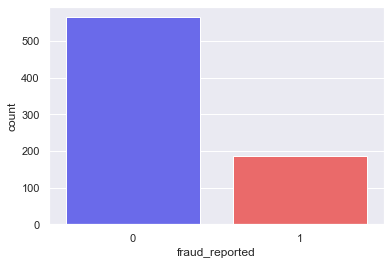

In [181]:
#dist of dv
sns.set()
sns.countplot(x=y_train, palette='seismic');

1    565
0    565
Name: fraud_reported, dtype: int64


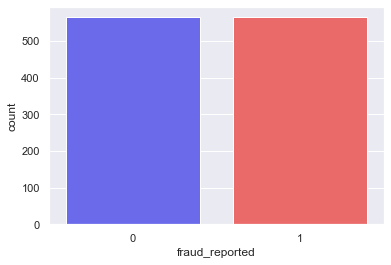

In [182]:
#SMOTE data for train set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
print(y_train.value_counts())

sns.countplot(x=y_train, palette='seismic');

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

rf_values = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }


    
rs_rf = RandomizedSearchCV(rf, rf_values, cv=10, n_jobs = -1, random_state=42)
rs_rf.fit(x_train, y_train)
print(rs_rf.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 90}


In [187]:
from xgboost import XGBClassifier
xg = XGBClassifier(booster='gbtree', n_jobs=-1)

xg_values = {'max_depth': [3, 4, 5, 6],
             'eta': [0.05, 0.1, 0.15, 0.3],
             'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
             'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1],
             'gamma': [0, 1, 2, 3],
             'n_estimators': [150, 250, 350, 450, 500, 550, 600, 650],
             
              }
    
rs_xg = RandomizedSearchCV(xg, xg_values, cv=10, n_jobs = -1, random_state=42)
rs_xg.fit(x_train, y_train)
print(rs_xg.best_params_)

{'reg_lambda': 0.05, 'reg_alpha': 0.5, 'n_estimators': 350, 'max_depth': 5, 'gamma': 0, 'eta': 0.05}


In [195]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
def scores(t, name):
    print (name, 'classification metric')
    #Evaluation metrics
    predictions = t.predict(x_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    
    print(f'Precision: {round(preci,3)}')
    print(f'Recall: {round(sensi,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))

In [196]:
classifiers={'Random forest':rs_rf, 'XGBoost':rs_xg}

for key, value in classifiers.items(): 
    print(scores(value,key))
    print("__________________________")
    print(" ")

Random forest classification metric
Precision: 0.565
Recall: 0.21
F1: 0.306
ROC AUC Score: 0.774
None
__________________________
 
XGBoost classification metric
Precision: 0.611
Recall: 0.532
F1: 0.569
ROC AUC Score: 0.828
None
__________________________
 


In [197]:
#lets save the xgboost model coz it eval metrics decent enough
import joblib
#save model
joblib.dump(rs_xg, "xb_bst.pkl")

['xb_bst.pkl']